# 2. Are paid courses more likely to be highly rated than free courses?
In this part I would like to address the question if there's a bias towards the courses that are paid vs. the free courses. Let's see if people that pay for a course are more likely to rate a course higher because he/she paid for it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Course_info.csv')

In [3]:
df = data[['id', 'title', 'avg_rating', 'num_reviews', 'language', 'is_paid', 'price']].copy()

## 2.1 Look at the Distribution
We will look at the distribution of paid and free courses and compare its means. We would like to know if there is a difference between both means.

In [4]:
df_pay = df[df['is_paid']==True].copy()
df_free = df[df['is_paid']==False].copy()

df_pay.rename(columns={'avg_rating':'avg_rating_pay'}, inplace=True)
df_free.rename(columns={'avg_rating':'avg_rating_free'}, inplace=True)
df_merge = pd.merge(df_pay, df_free, how='outer')

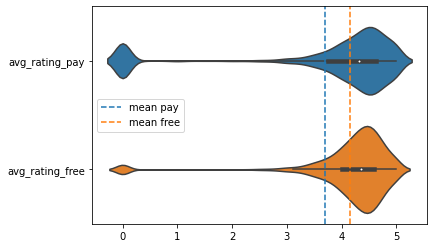

In [5]:
sns.violinplot(data=df_merge[['avg_rating_pay', 'avg_rating_free']], scale='area', inner='box', orient='h')
plt.axvline(x=df_merge[['avg_rating_pay']].mean().values, color='C0', linestyle='--', label='mean pay')
plt.axvline(x=df_merge[['avg_rating_free']].mean().values, color='C1', linestyle='--', label='mean free')
plt.legend(loc='center left')
plt.show()

We clearly see that there is a difference between both means. What will be more interesting now, is if we can prove that there is statistical significance in our results. For this, an hypothesis testing is proposed.

## 2.2 Hypothesis Testing
Our *null hypothesis* will be that the rating mean of the paying group is **greater or equal** than the rating mean of the free group.

$$H_0: \ \mu_{pay} \geq \mu_{free}$$
$$H_1: \ \mu_{pay} \lt \mu_{free}$$

Or equivalently
$$H_0: \ \mu_{pay} - \mu_{free} \geq 0$$
$$H_1: \ \mu_{pay} - \mu_{free} \lt 0$$

To solve this, a bootstrap approach will be used.

In [6]:
df_pay = df[df['is_paid']==True].copy()
df_free = df[df['is_paid']==False].copy()

In [7]:
df_pay_mean = df_pay.describe().loc[['mean']].drop(
    columns=['id', 'price']).rename(
    columns={'avg_rating':'avg_rating_pay', 'num_reviews':'num_reviews_pay'})

In [8]:
df_free_mean = df_free.describe().loc[['mean']].drop(
    columns=['id', 'price']).rename(
    columns={'avg_rating':'avg_rating_free', 'num_reviews':'num_reviews_free'})

In [9]:
df_mean = pd.merge(df_pay_mean, df_free_mean, left_index=True, right_index=True)

In [10]:
df_mean['diff_avg_rating'] = df_mean['avg_rating_pay'] - df_mean['avg_rating_free']

In [11]:
df_mean['diff_num_reviews'] = df_mean['num_reviews_pay'] - df_mean['num_reviews_free']

In [12]:
df_mean.style.bar(subset=['diff_avg_rating'], color=['red', 'green'], axis=0)

,avg_rating_pay,num_reviews_pay,avg_rating_free,num_reviews_free,diff_avg_rating,diff_num_reviews
mean,3.700308,237.278644,4.152535,305.589981,-0.452227,-68.311336


In [13]:
pay_means = []
free_means = []
diff_means = []
key = 'avg_rating'
samples = 1000

for i in range(10000):
    pay_mean = np.mean(df_pay.sample(samples)[key])
    free_mean = np.mean(df_free.sample(samples)[key])
    pay_means.append(pay_mean)
    free_means.append(free_mean)
    diff_means.append(pay_mean - free_mean)

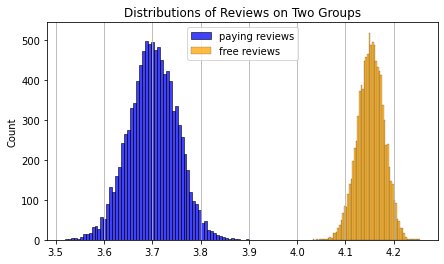

In [18]:
plt.rcParams['figure.figsize']=(7,4)
sns.histplot(pay_means, color='blue', label='paying reviews')
sns.histplot(free_means, color='orange', label='free reviews')
plt.legend()
plt.title('Distributions of Reviews on Two Groups')
plt.grid(axis='x')
plt.show()

In [19]:
diff_normal = np.random.normal(0.0, np.std(diff_means), 10000 )

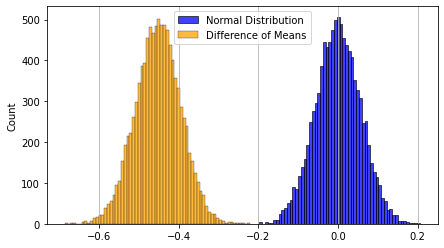

In [20]:
plt.rcParams['figure.figsize']=(7,4)
sns.histplot(diff_normal, color='blue', label='Normal Distribution')
sns.histplot(diff_means, color='orange', label='Difference of Means')
plt.grid(axis='x')
plt.legend()
plt.show()

In [21]:
mu = df_pay['avg_rating'].mean() - df_free['avg_rating'].mean()

In [22]:
p_val = (diff_normal < mu).mean()
p_val

0.0

In [23]:
if p_val <= 0.05:
    print('We reject the null.')
else:
    print('We accept the null.')

We reject the null.


## 2.3 Conclusion
Based on the results we can see that people who pay for a course in Udemy tend to give a lower rate to a course than people who take a free course in Udemy. It is interesting because my initial preconception was that people who pay for a course would rate the course higher. After these results, maybe the reason for this is that a person who pays for a course expects high quality on it compared to a free one?